<a href="https://colab.research.google.com/github/shashwatb23/Week_3/blob/main/Week_3(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing relavant modules

In [ ]:
import tensorflow as tf

from keras.datasets import cifar100
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD

Load Dataset

In [ ]:
(Xtrain,ytrain),(Xtest,ytest)=cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Checking number of unique labels in ytrain

In [ ]:
len(np.unique(ytrain))

100

Printing 25 sample images from Xtrain

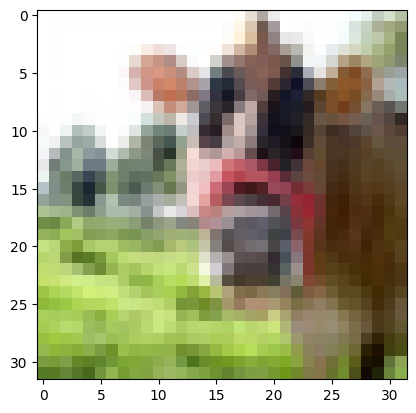

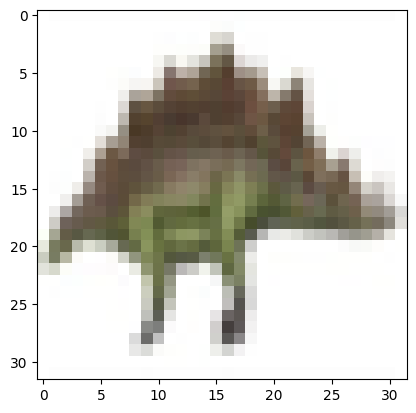

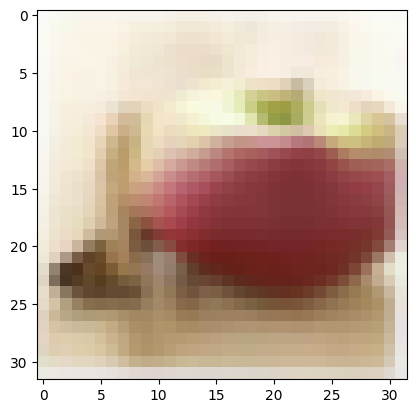

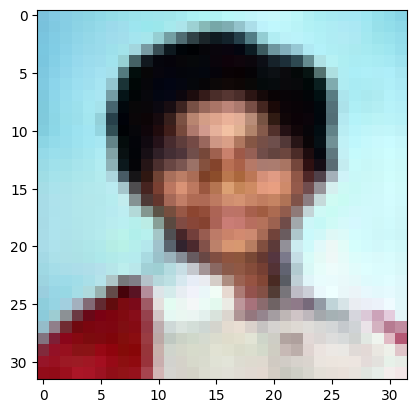

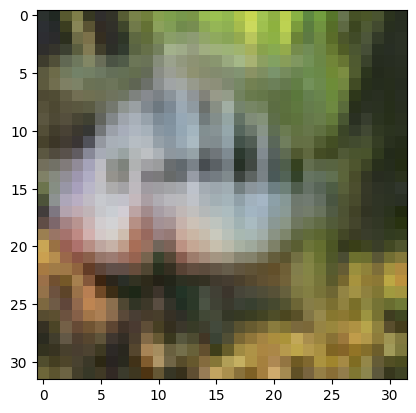

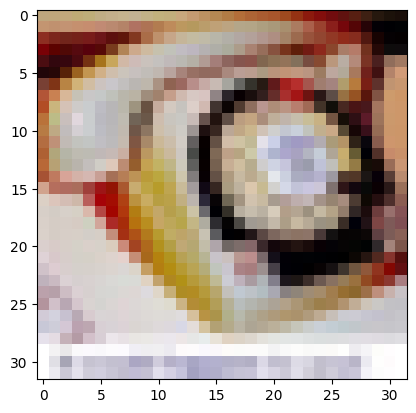

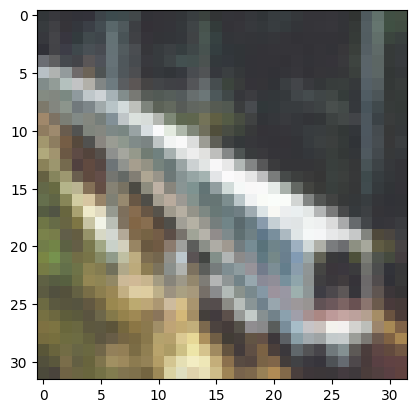

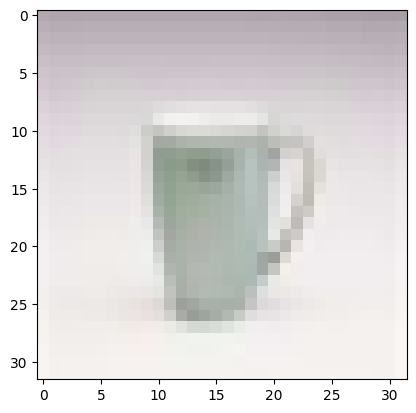

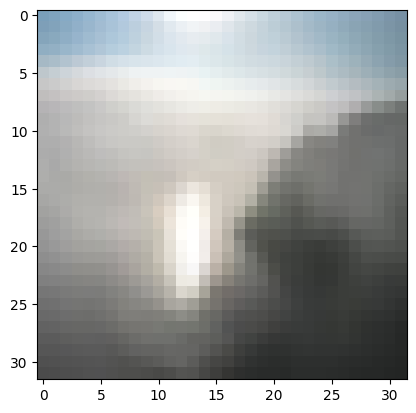

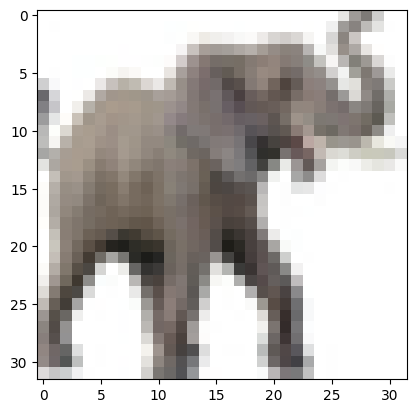

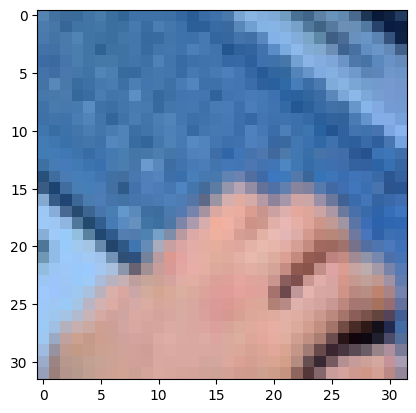

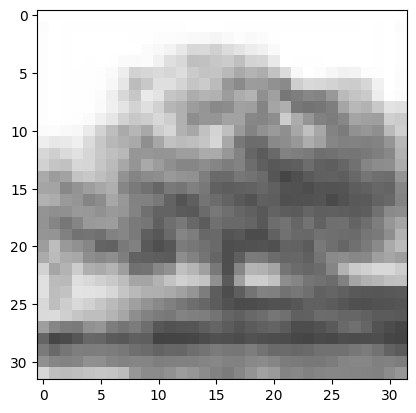

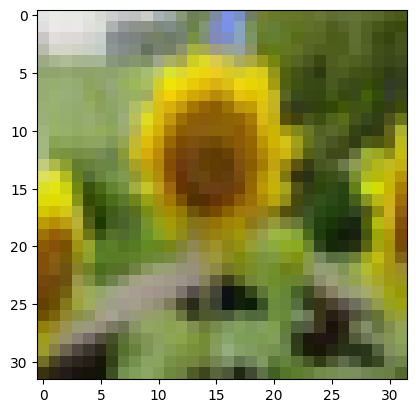

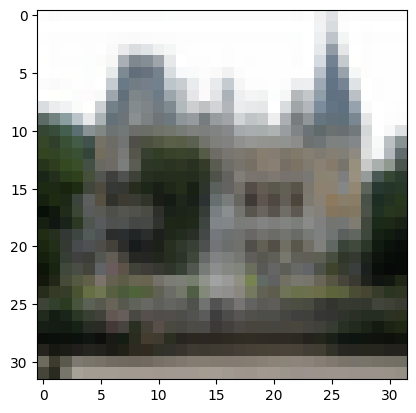

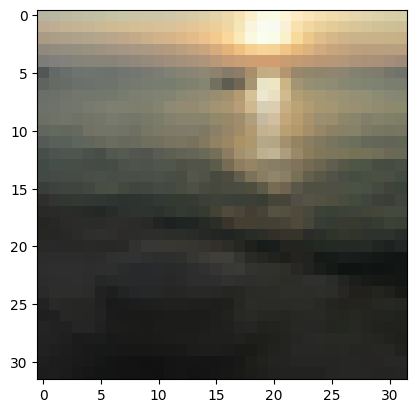

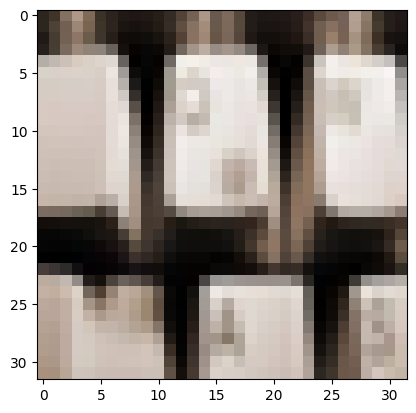

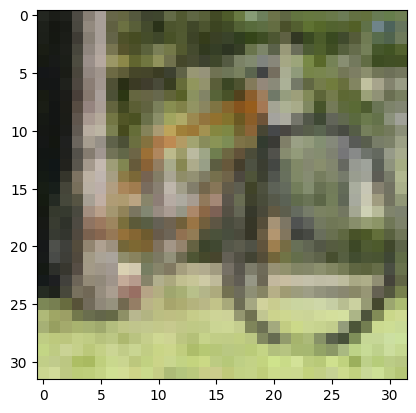

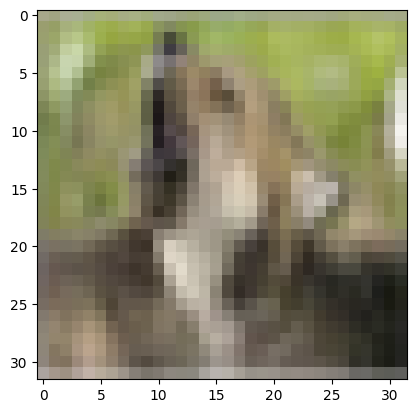

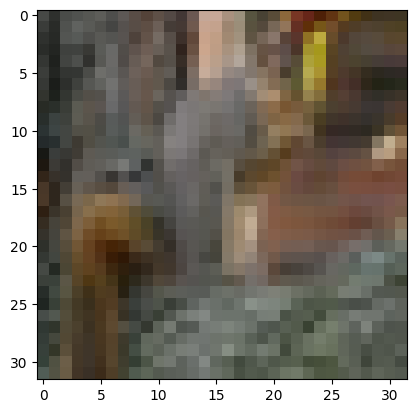

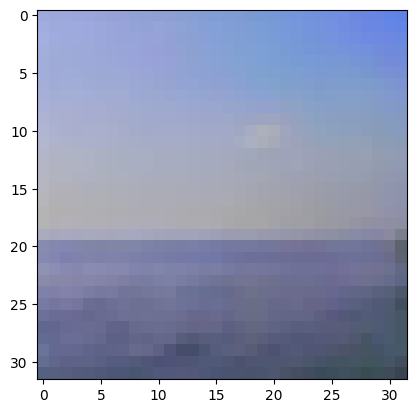

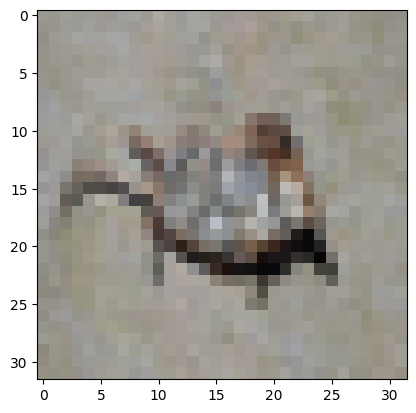

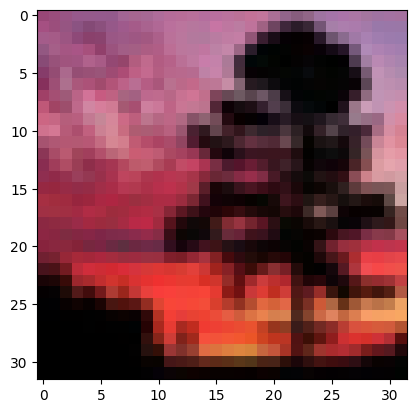

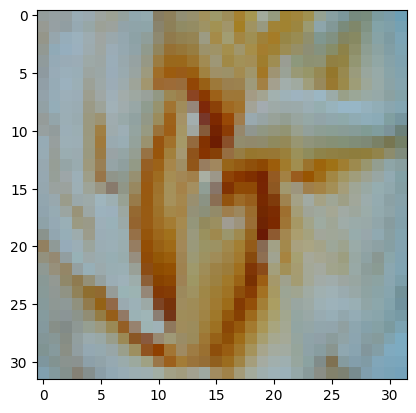

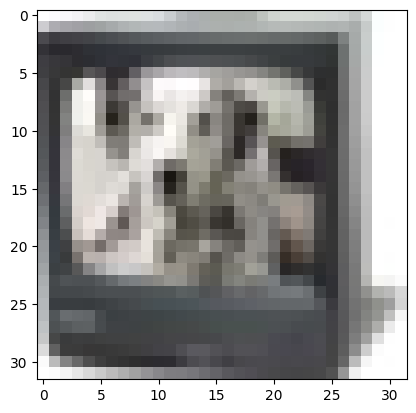

In [ ]:
for i in range(24):
  plt.figure(i+1)
  implot=plt.imshow(Xtrain[i])
  plt.show()

Printing 25 images from test data

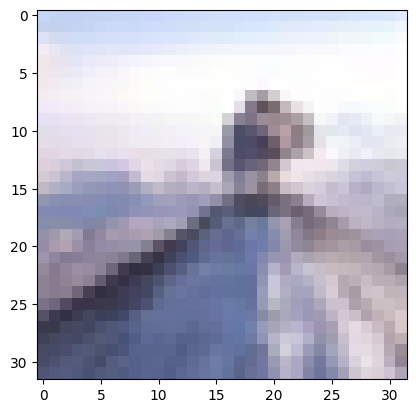

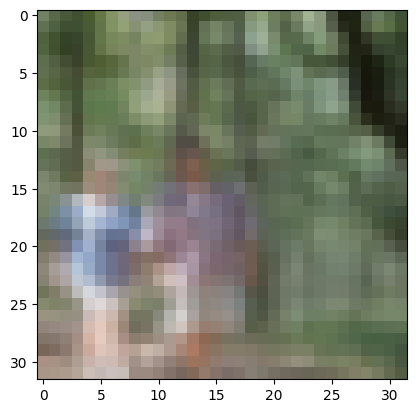

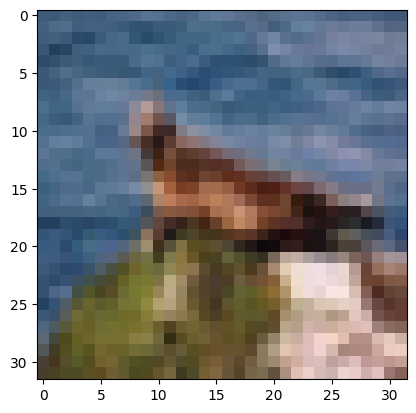

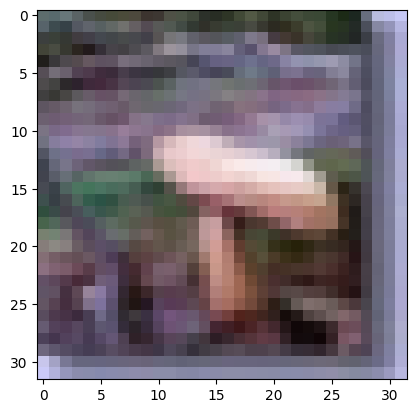

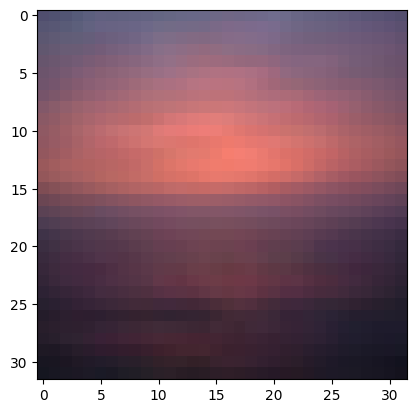

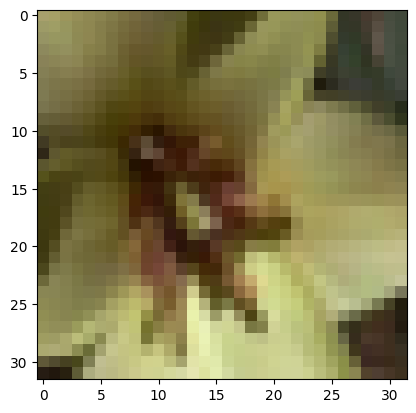

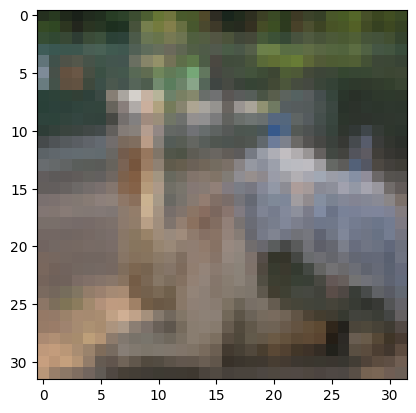

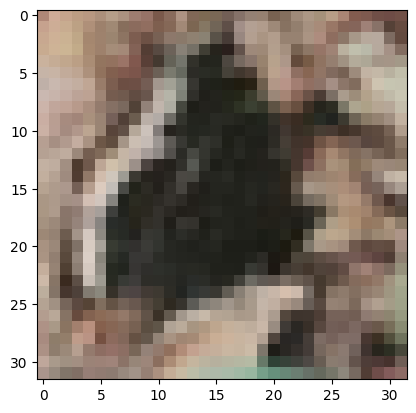

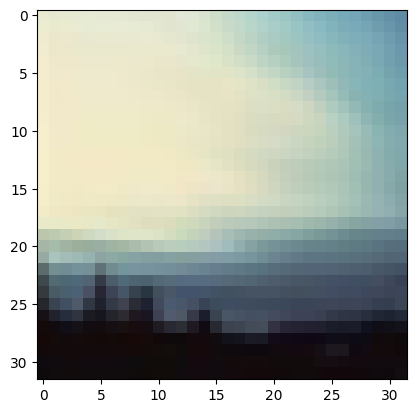

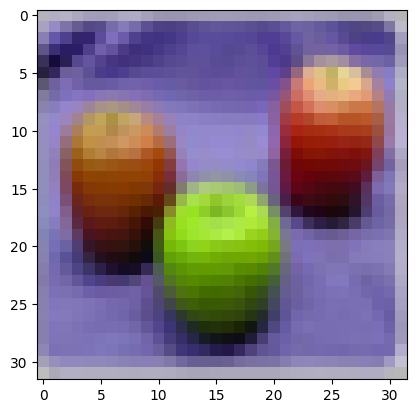

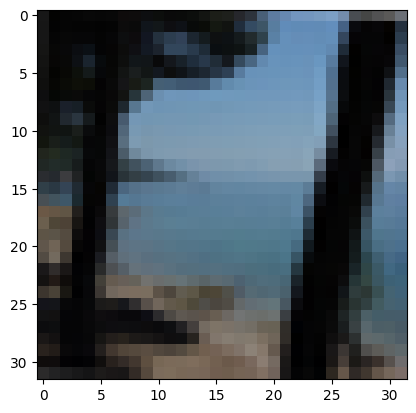

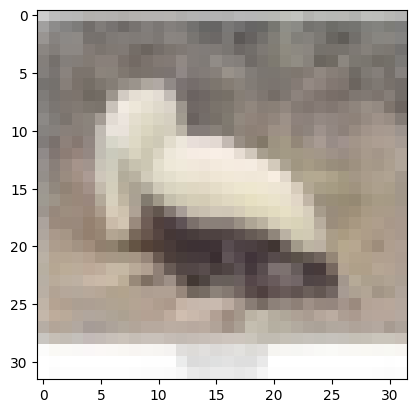

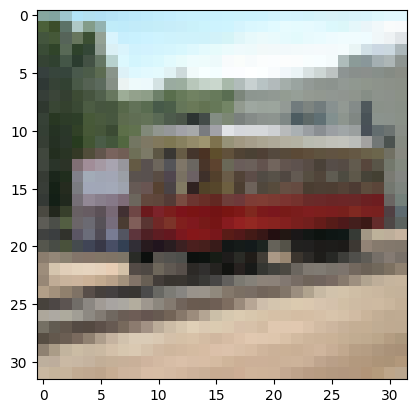

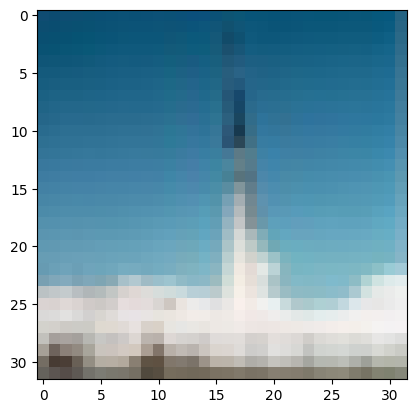

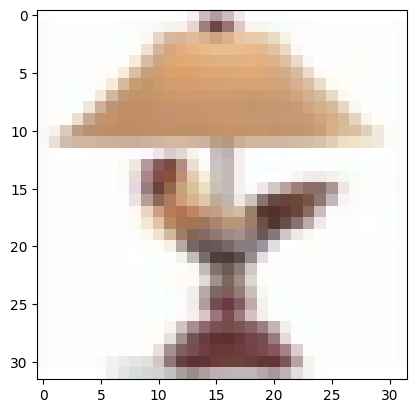

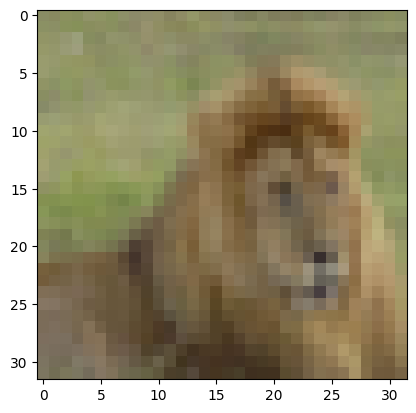

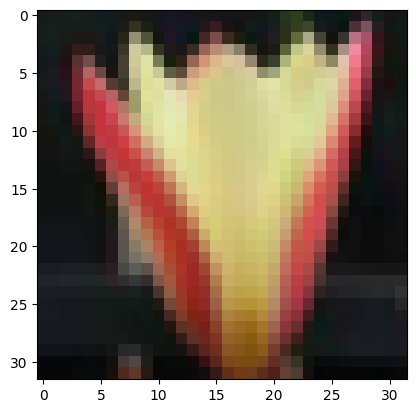

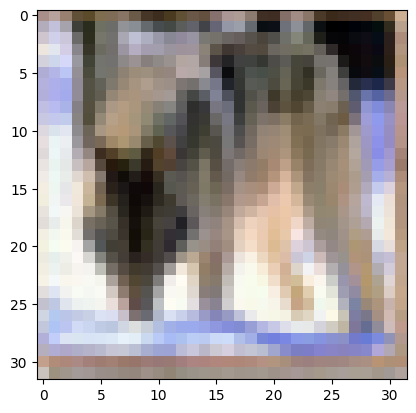

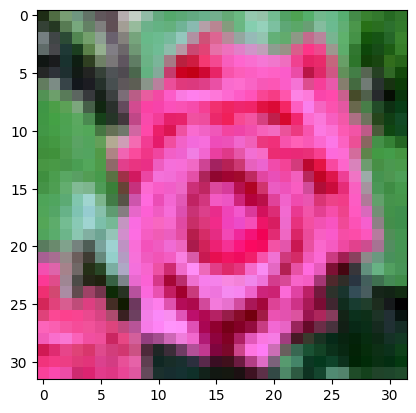

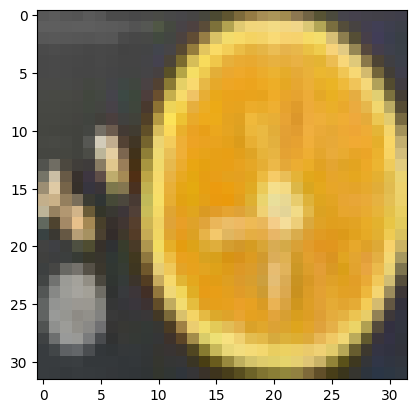

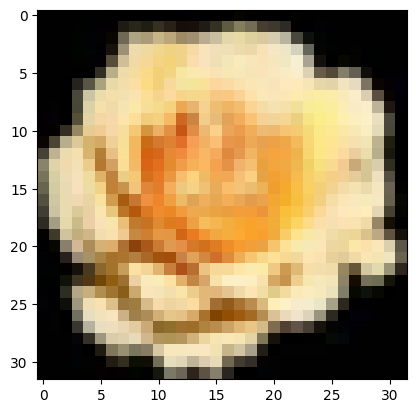

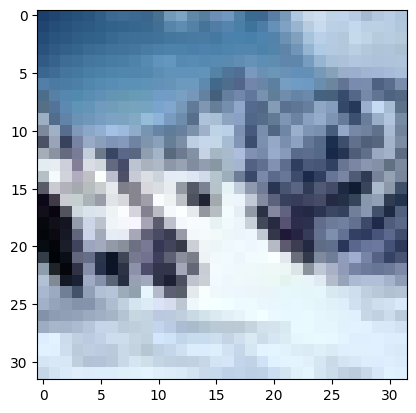

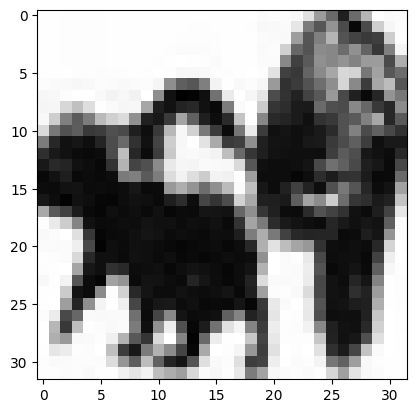

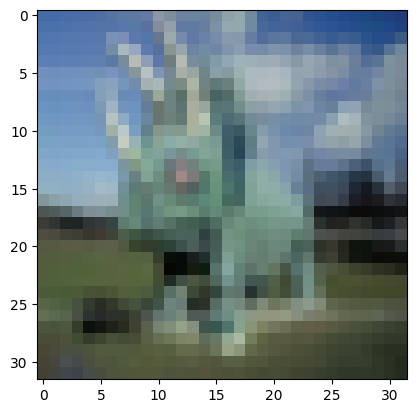

In [ ]:
for i in range(24):
  plt.figure(i+1)
  imgplot=plt.imshow(Xtest[i])
  plt.show()

Normalizing Data

In [ ]:
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain[0:20000,:]/255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest/255.0
ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain[0:20000],depth=100)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest,depth=100)
#

Creating model

In [ ]:
nc = 100
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax')) # Corrected number of output neurons
opt = SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(Xtrain,ytrainEnc,epochs=100,batch_size=550,validation_data=(Xtest,ytestEnc))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis = 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.0083 - loss: 4.6464 - val_accuracy: 0.0108 - val_loss: 4.6044
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 167s 5s/step - accuracy: 0.0104 - loss: 4.6025 - val_accuracy: 0.0113 - val_loss: 4.5954
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 203s 5s/step - accuracy: 0.0130 - loss: 4.5924 - val_accuracy: 0.0168 - val_loss: 4.5884
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 167s 5s/step - accuracy: 0.0153 - loss: 4.5860 - val_accuracy: 0.0198 - val_loss: 4.5809
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.0217 - loss: 4.5749 - val_accuracy: 0.0239 - val_loss: 4.5708
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 206s 5s/step - accuracy: 0.0240 - loss: 4.5663 - val_accuracy: 0.0277 - val_loss: 4.5577
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 219s 5s/step - accuracy: 0.0291 - loss: 4.5514 - val_accuracy: 0.0319 - val_loss: 4.5407
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.0319 - loss: 4.5332 - val_accuracy: 0.

predicting accuracy score

In [ ]:
score = accuracy_score(ytest,ypred)
print(score)